<a href="https://colab.research.google.com/github/vinayarkala/British-Airways-/blob/main/British_Airways_(BA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
import numpy as np

In [ ]:
reviews = []
stars = []
date = []
country = []


In [ ]:

for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 34
Error on page 35
Error on page 35


In [ ]:
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
stars = stars[:3500]

In [ ]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | This time British Airways ...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,7th March 2025,United Kingdom
1,"✅ Trip Verified | The seats were excellent, ...",9,28th February 2025,United Kingdom
2,✅ Trip Verified | After the nightmare of get...,9,27th February 2025,United Kingdom
3,✅ Trip Verified | Prior to boarding a gate a...,5,21st February 2025,United Kingdom
4,✅ Trip Verified | I flew from Amsterdam to L...,3,18th February 2025,Netherlands


In [ ]:
df.shape

(3500, 4)

export data into csv

In [ ]:
import os
cwd = os.getcwd()
df.to_csv(cwd+"/BA_reviews.csv")

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [ ]:

df.head()

,reviews,stars,date,country
0,✅ Trip Verified | This time British Airways ...,5.0,7th March 2025,United Kingdom
1,"✅ Trip Verified | The seats were excellent, ...",9.0,28th February 2025,United Kingdom
2,✅ Trip Verified | After the nightmare of get...,9.0,27th February 2025,United Kingdom
3,✅ Trip Verified | Prior to boarding a gate a...,5.0,21st February 2025,United Kingdom
4,✅ Trip Verified | I flew from Amsterdam to L...,3.0,18th February 2025,Netherlands


In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:

df['verified']

,verified
0,True
1,True
2,True
3,True
4,True
...,...
3495,False
3496,False
3497,False
3498,False


cleaning reviews


In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk # import nltk library

nltk.download('stopwords') # Download stopwords data
nltk.download('wordnet') # Download wordnet data, this is the fix
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | This time British Airways ...,5.0,7th March 2025,United Kingdom,True,time british airway managed get everything rig...
1,"✅ Trip Verified | The seats were excellent, ...",9.0,28th February 2025,United Kingdom,True,seat excellent feel much room official seat pi...
2,✅ Trip Verified | After the nightmare of get...,9.0,27th February 2025,United Kingdom,True,nightmare getting triple security nairobi airp...
3,✅ Trip Verified | Prior to boarding a gate a...,5.0,21st February 2025,United Kingdom,True,prior boarding gate agent seemed pick elderly ...
4,✅ Trip Verified | I flew from Amsterdam to L...,3.0,18th February 2025,Netherlands,True,flew amsterdam la vega layover heathrow novemb...


In [ ]:
df.dtypes

,0
reviews,object
stars,float64
date,object
country,object
verified,bool
corpus,object


In [ ]:
df.date = pd.to_datetime(df.date, format='mixed', errors='coerce')

In [ ]:
df.date.head()

,date
0,2025-03-07
1,2025-02-28
2,2025-02-27
3,2025-02-21
4,2025-02-18


cleanig rating with stars

In [ ]:
df.stars.unique()

array([ 5.,  9.,  3.,  1.,  4.,  7.,  2.,  8., 10.,  6., nan])

In [ ]:
# Convert 'stars' column to numeric, handling "None" as NaN
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Now you can safely remove whitespace if still needed after conversion:
# Example if you need to remove leading/trailing spaces from strings in another column:
# df['reviews'] = df['reviews'].str.strip()

# If you still need to strip characters from 'stars' AFTER conversion to numeric:
# Convert the numeric 'stars' back to strings to use .str.strip
df['stars'] = df['stars'].astype(str).str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

# Optionally convert back to numeric if desired:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

In [ ]:

df.stars.value_counts()

,count
stars,
1.0,895
2.0,407
3.0,398
8.0,334
10.0,276
7.0,275
9.0,266
5.0,245
4.0,234


In [ ]:
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
df.stars.unique()

array([ 5.,  9.,  3.,  1.,  4.,  7.,  2.,  8., 10.,  6., nan])

cleccking nul values

In [ ]:

df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3498
                       True     False     False        1
         True   False  False    False     False        1
Name: count, dtype: int64

In [ ]:
df.country.isnull().value_counts()

,count
country,
False,3499
True,1


In [ ]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3499, 6)

In [ ]:
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | This time British Airways ...,5.0,2025-03-07,United Kingdom,True,time british airway managed get everything rig...
1,"✅ Trip Verified | The seats were excellent, ...",9.0,2025-02-28,United Kingdom,True,seat excellent feel much room official seat pi...
2,✅ Trip Verified | After the nightmare of get...,9.0,2025-02-27,United Kingdom,True,nightmare getting triple security nairobi airp...
3,✅ Trip Verified | Prior to boarding a gate a...,5.0,2025-02-21,United Kingdom,True,prior boarding gate agent seemed pick elderly ...
4,✅ Trip Verified | I flew from Amsterdam to L...,3.0,2025-02-18,Netherlands,True,flew amsterdam la vega layover heathrow novemb...
...,...,...,...,...,...,...
3494,CPH-LHR-CPH October 2014. Air travel just keep...,10.0,2014-11-25,Denmark,False,cph lhr cph october air travel keep getting be...
3495,On past experience I chose BA for our long hau...,10.0,2014-11-25,United Kingdom,False,past experience chose ba long haul return flig...
3496,SFO-LHR-DXB and return DXB-LHR-DEN outbound in...,7.0,2014-11-20,United States,False,sfo lhr dxb return dxb lhr den outbound premiu...
3497,Flew with my wife LHR-JNB BA055 on an A380 Oct...,9.0,2014-11-20,France,False,flew wife lhr jnb ba october st back jnb lhr b...


In [ ]:
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

Exploratory data analysis

In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:

df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | This time British Airways ...,5.0,2025-03-07,United Kingdom,True,time british airway managed get everything rig...
1,"✅ Trip Verified | The seats were excellent, ...",9.0,2025-02-28,United Kingdom,True,seat excellent feel much room official seat pi...
2,✅ Trip Verified | After the nightmare of get...,9.0,2025-02-27,United Kingdom,True,nightmare getting triple security nairobi airp...
3,✅ Trip Verified | Prior to boarding a gate a...,5.0,2025-02-21,United Kingdom,True,prior boarding gate agent seemed pick elderly ...
4,✅ Trip Verified | I flew from Amsterdam to L...,3.0,2025-02-18,Netherlands,True,flew amsterdam la vega layover heathrow novemb...


In [ ]:
df.stars.mean()

4.522870211549457

Text(0.5, 0.98, 'Counts for each ratings')

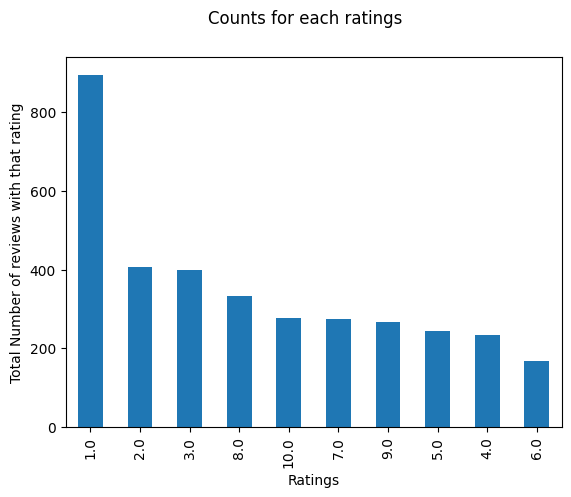

In [ ]:

df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
# Rename the 'count' column to 'stars' for clarity
df_ratings = df_ratings.rename(columns={'count': 'stars'})
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
df_ratings = df_ratings.reset_index(drop=True)  # Reset the index and drop the old index
df_ratings = df_ratings.rename(columns={'index': 'rating'})  # Rename the column

In [ ]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings

,stars,total_counts,pct_values
0,1.0,895,25.59
1,2.0,407,11.64
2,3.0,398,11.38
3,8.0,333,9.52
4,10.0,276,7.89
5,7.0,275,7.86
6,9.0,266,7.60
7,5.0,245,7.00
8,4.0,234,6.69
9,6.0,169,4.83


<ipython-input-85-4c15d6f7c6df>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
<ipython-input-85-4c15d6f7c6df>:17: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

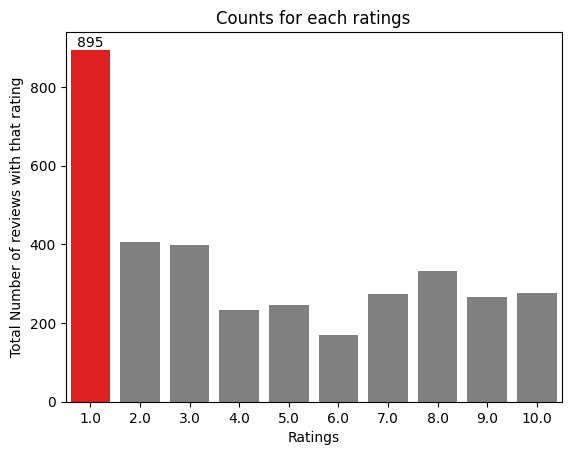

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
# Rename the 'count' column to 'total_counts' for clarity
df_ratings = df_ratings.rename(columns={'count': 'total_counts'})
pct_values = (df_ratings.total_counts.values/ df_ratings.total_counts.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

# Reset the index without the 'name' argument
df_ratings = df_ratings.reset_index()

# Rename the columns after resetting the index
# The original column name was probably 'stars', not 'Stars'
df_ratings.rename(columns={'index': 'stars', 'total_counts': 'total_counts'}, inplace=True)

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
# Access the correct column name 'stars' instead of 'Stars'
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)

ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [ ]:

df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:

df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

Text(0.5, 1.0, 'Maximum number of review by country')

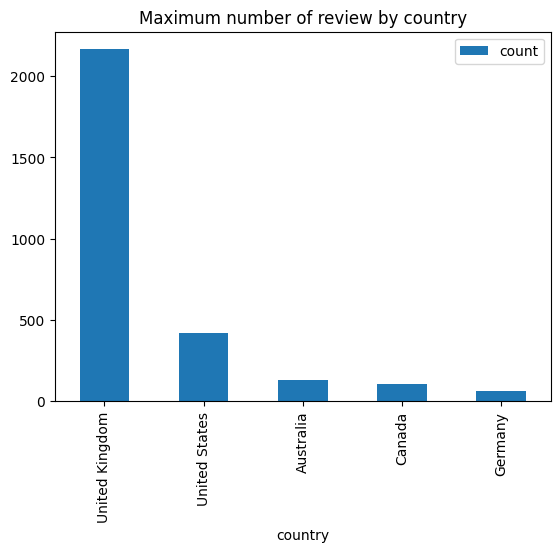

In [ ]:

df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [ ]:
# Convert 'stars' column to numeric, handling "None" as NaN
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Remove rows with NaN values in 'stars' column
df = df.dropna(subset=['stars'])

# Ensure 'stars' column is of numeric type
df['stars'] = df['stars'].astype(float)  # or int, depending on desired type

# Now, calculate the mean by country
# The error was likely caused by trying to calculate the mean of non-numeric data.
# We first ensure the 'stars' column is numeric before calculating the mean.
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()

<ipython-input-96-465f1adbcca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stars'] = pd.to_numeric(df['stars'], errors='coerce')


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

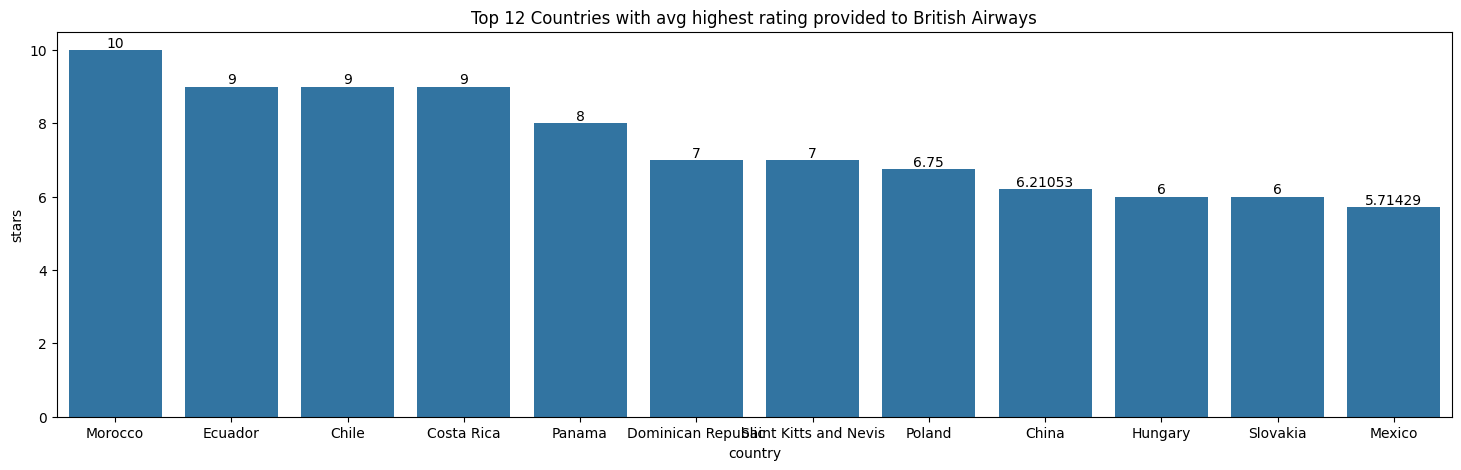

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
# Use 'stars' for the y-axis as it contains the average ratings
ax1 = sns.barplot(x='country', y='stars', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [ ]:

#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [ ]:

fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

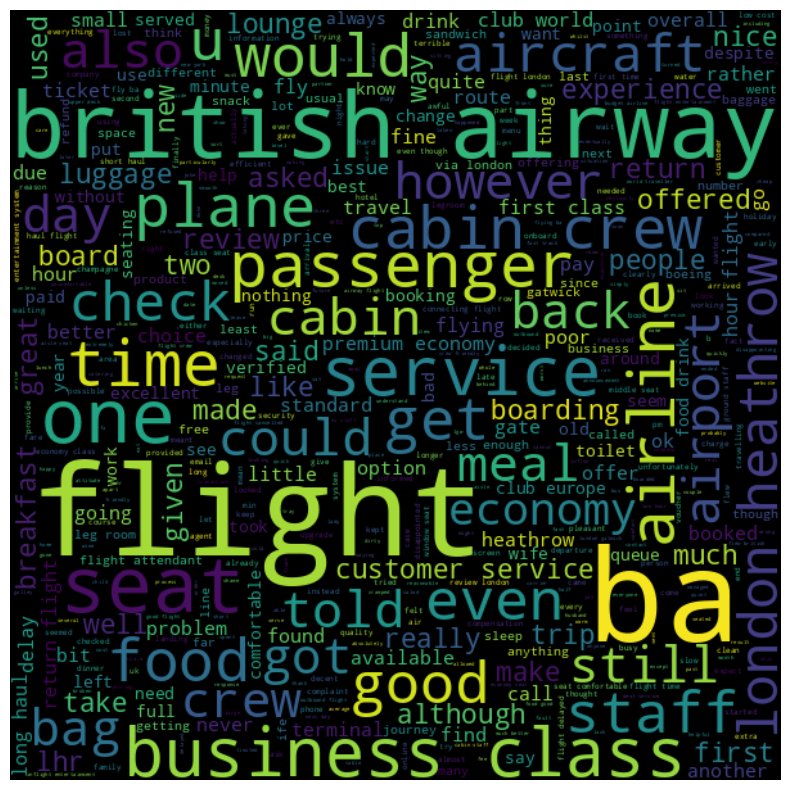

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

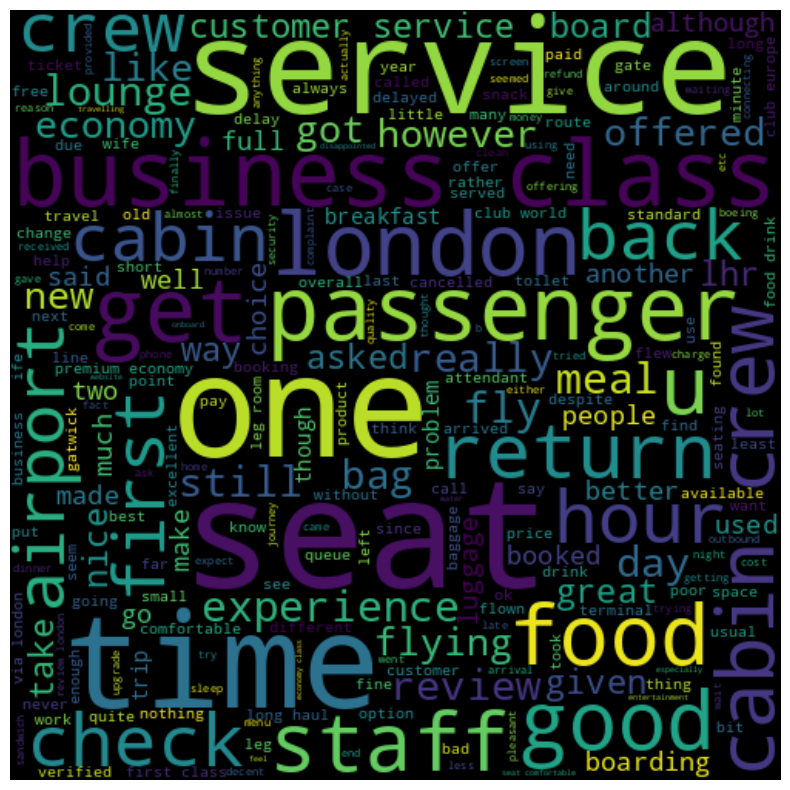

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word **Frequency**

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'class'),
  Text(7, 0, 'good'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'customer'),
  Text(18, 0, 'club'),
  Text(19, 0, 'boarding')])

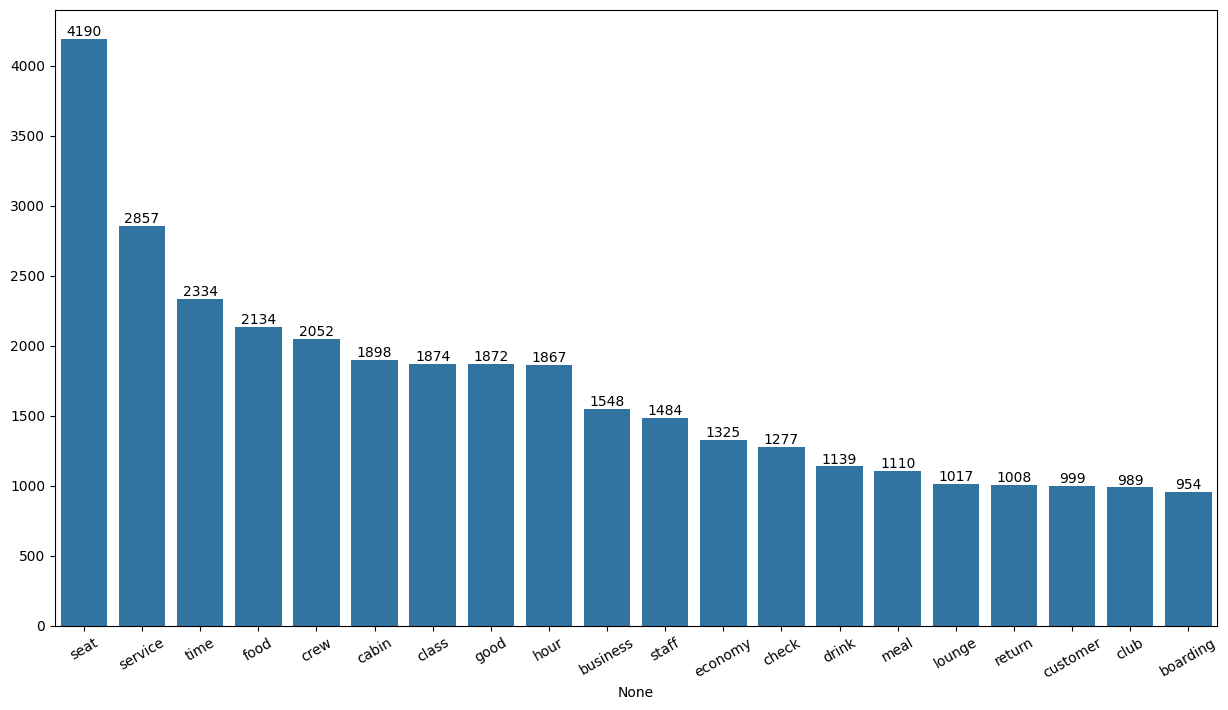

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)


Word Frequency with N-**gram**

<Axes: >

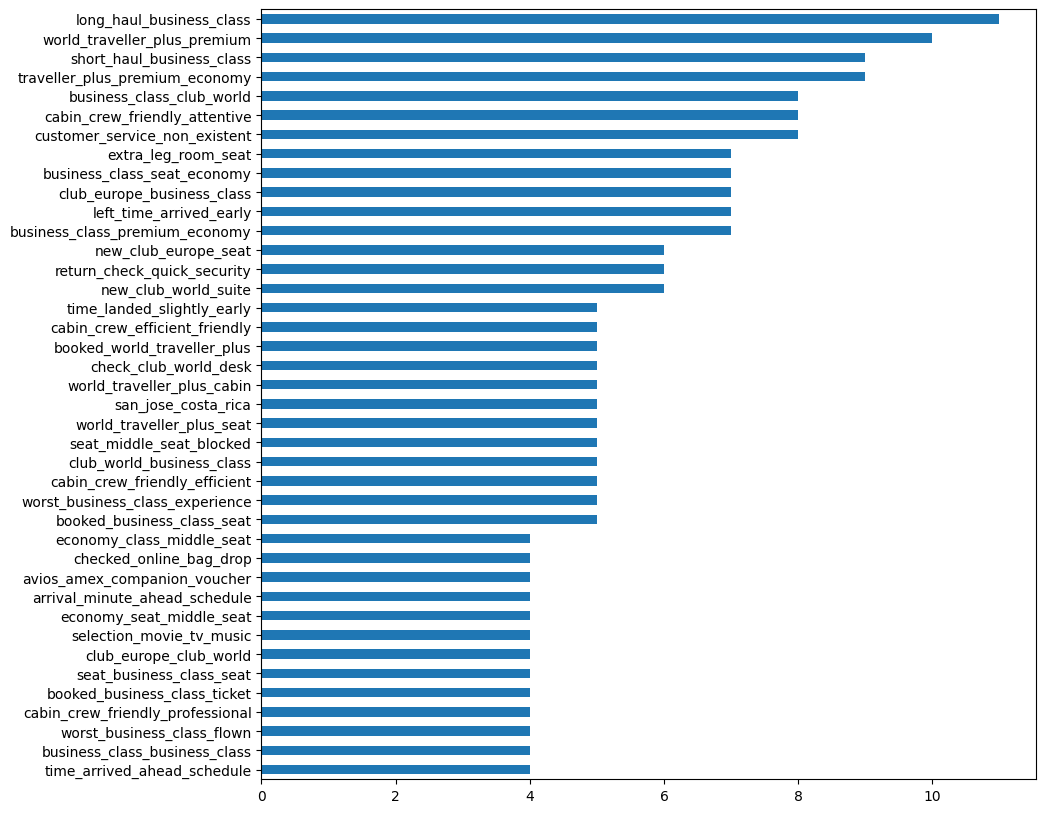

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)


We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [ ]:

ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

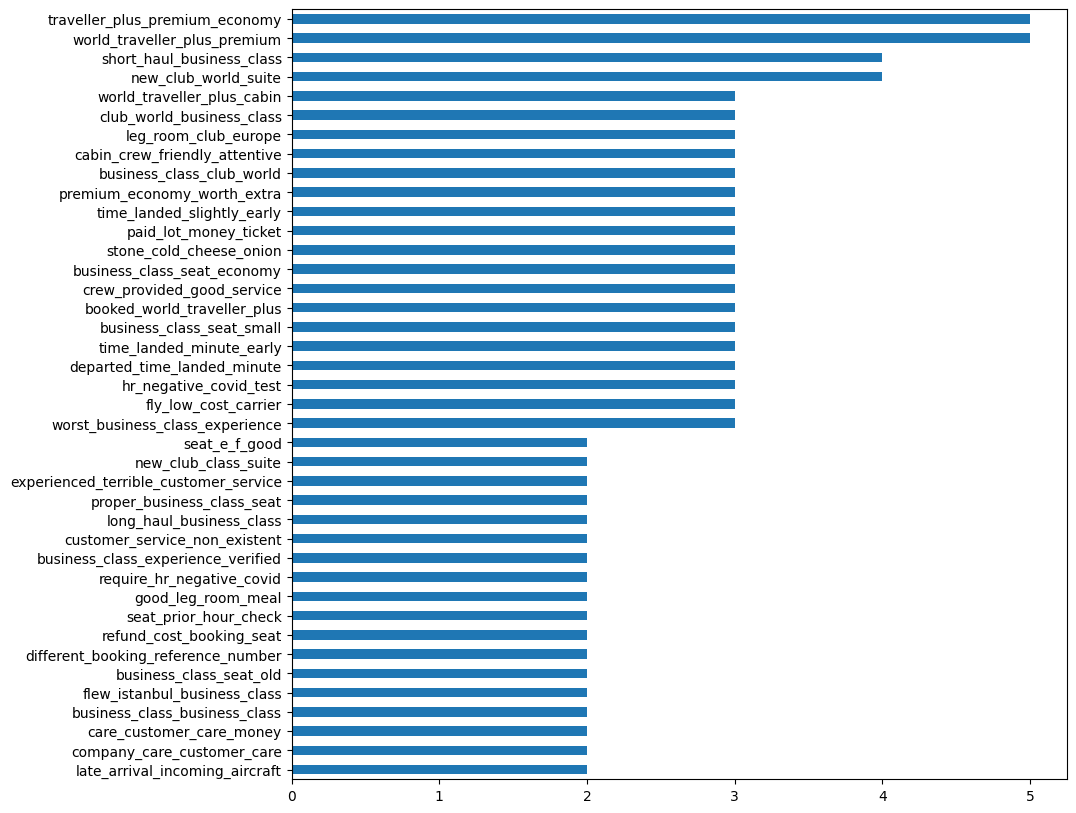

In [ ]:

reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10,4)

<Axes: >

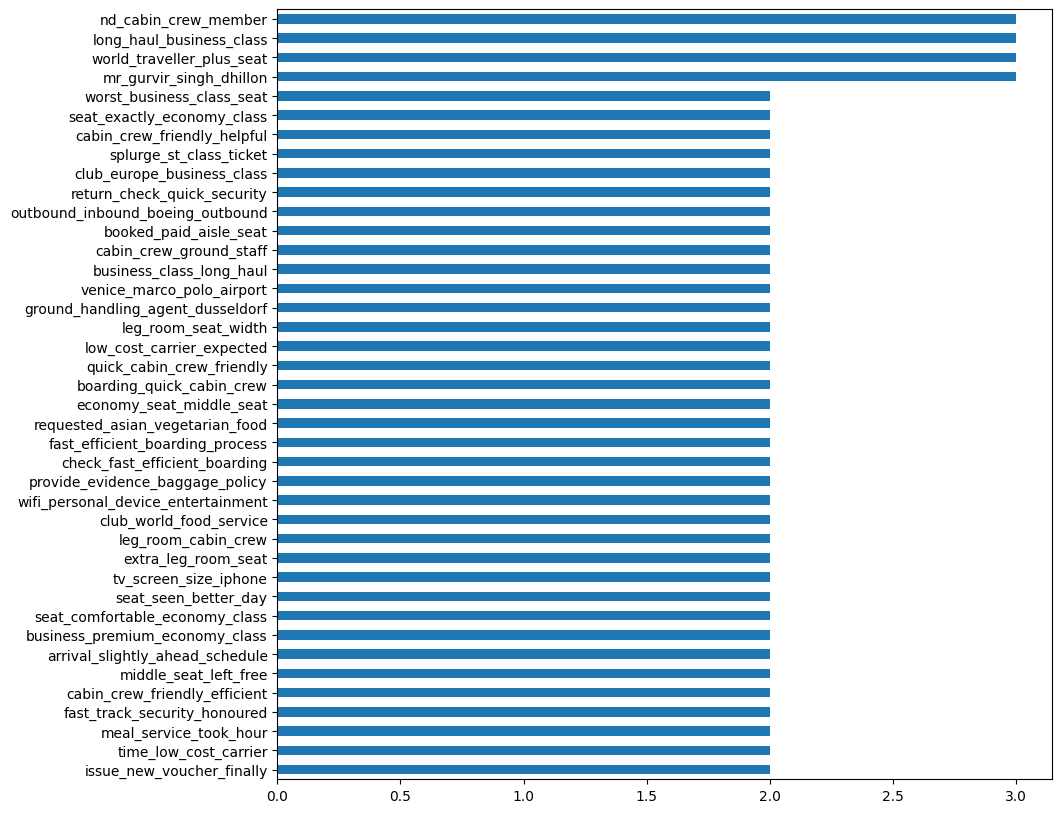

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

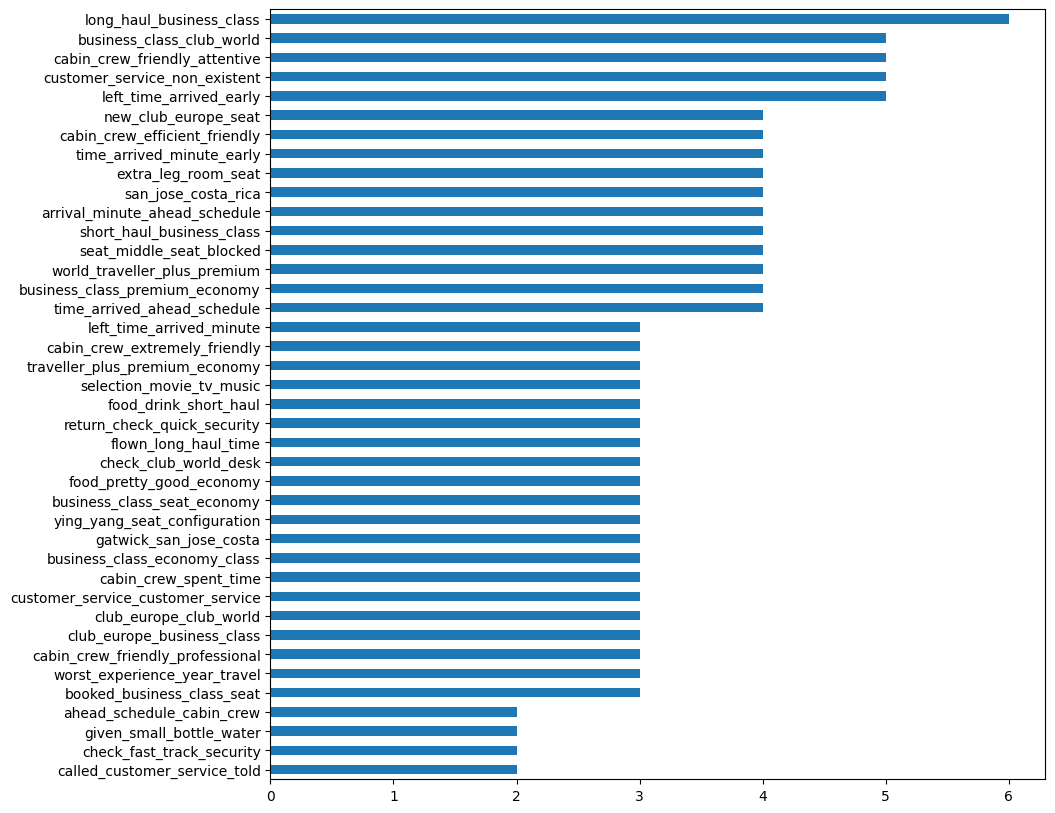

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Set a column 'polarity' with all 0 values initially
df['polarity'] = 0

# Iterate through the DataFrame using .iterrows()
for index, row in df.iterrows():
    sent = TextBlob(row['corpus'])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df.loc[index, 'polarity'] = polarity  # Update the 'polarity' column for the current row

In [ ]:

# let's see how many texts are with positive comments
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2426 number of reviews between -0.2 and 0.2 polarity score
1429 number of reviews between -0.1 and 0.1 polarity score



Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [ ]:
%%capture
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

# Instead of iterating using a range, iterate over the index of the DataFrame:
for i in df.index:

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df.loc[i, 'label'] = 1  # Update 'label' using .loc for index-based assignment
        #print("1st")
    elif score < 0:
        df.loc[i, 'label'] = -1  # Update 'label' using .loc for index-based assignment
        #print("2nd")
    else:
        df.loc[i, 'label'] = 0  # Update 'label' using .loc for index-based assignment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

df.label.value_counts()

,count
label,
1,2172
-1,1204
0,122


topic modeling with LDA:
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library

In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,ba,1111.9,seat,969.2,flight,2289.4,bag,566.4,seat,228.4,flight,3130.1,class,386.7,meal,74.0
1,seat,864.0,flight,562.2,ba,1083.2,flight,563.5,flight,149.4,seat,1819.6,ba,351.6,tea,49.4
2,flight,861.8,british,462.3,hour,844.6,luggage,385.9,service,125.1,good,1657.4,business,306.8,airway,47.7
3,class,597.2,airway,449.3,told,518.6,london,325.6,airline,122.3,ba,1636.9,airline,271.7,british,44.3
4,business,506.8,london,355.0,time,507.8,ba,253.8,passenger,109.4,crew,1593.6,seat,223.9,snack,41.3
5,airway,472.8,economy,328.7,get,499.6,baggage,249.4,crew,100.5,food,1419.6,food,183.6,one,38.3
6,service,461.5,airline,327.0,customer,494.4,heathrow,230.4,cabin,99.8,cabin,1325.9,service,127.1,water,37.8
7,british,451.6,ba,300.2,day,480.8,british,223.4,one,99.3,service,1322.7,british,109.9,flight,36.3
8,airline,391.6,heathrow,243.6,would,468.8,airway,221.5,british,98.1,time,1175.7,poor,108.7,drink,36.3
9,one,305.2,food,233.1,service,459.0,check,197.7,airway,97.4,drink,877.2,cost,107.7,asked,36.2


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

topic modeling with NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.02152106, 0.0701924 ],
       [0.00228702, 0.10026041],
       [0.02161955, 0.06736385],
       ...,
       [0.01316653, 0.13735174],
       [0.        , 0.22373023],
       [0.00054945, 0.13691324]])

In [ ]:

topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,35.6,seat,15.5
1,ba,11.9,ba,9.1
2,hour,8.4,class,7.1
3,time,6.5,business,5.6
4,london,6.0,service,5.6
5,british,6.0,food,5.5
6,airway,5.9,cabin,5.3
7,service,5.5,crew,5.1
8,would,5.2,good,5.0
9,day,4.6,economy,4.2



With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again